In [3]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import scipy.optimize as op
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
import numpy as np

In [8]:
#   5500   1.55
#   6500   2.31
#   7500   3.38
#   8500   4.37
#   9500   5.62
#  10500   6.55
#  11500   7.21
#  12500   7.98
#  13500   6.89
#  14500   6.60
#  15500   6.56
#  16500   5.67

Vel = np.arange(5500,17500,1000)
D   = np.asarray([1.55, 2.31, 3.38, 4.37, 5.62, 6.55, 7.21, 7.98, 6.89, 6.60, 6.56, 5.67])

for i, d in enumerate(D):
    print Vel[i], d

5500 1.55
6500 2.31
7500 3.38
8500 4.37
9500 5.62
10500 6.55
11500 7.21
12500 7.98
13500 6.89
14500 6.6
15500 6.56
16500 5.67


In [10]:
v = np.linspace(45000,1800,100)

[-1.09537962e-07  2.85196803e-03 -1.14213942e+01]


### $2^{nd}$ Degree Polynomial

\begin{align}
D_{damp}-D_{YH} & = C_2 V^2 + C_1  V + C_0
\end{align}

C2 =  -1.0953796203796217e-07
C1 =  0.002851968031968035
C0 =  -11.421394230769247


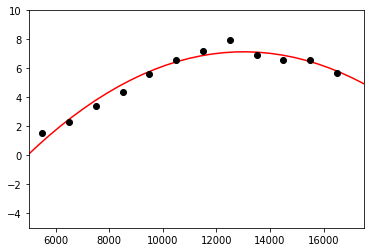

In [34]:
c = np.polyfit(Vel, D, 2)
plt.plot(v,c[0]*v**2+c[1]*v+c[2], 'r-')
plt.plot(Vel,D, 'ko')
plt.xlim(5000,17500)
plt.ylim(-5,10)

print 'C2 = ', c[0]
print 'C1 = ', c[1]
print 'C0 = ', c[2]

### $3^{rd}$ Degree Polynomial

\begin{align}
D_{damp}-D_{YH} & = C_3 V^3 + C_2 V^2 + C_1  V + C_0
\end{align}

C3 =  -7.364672364672449e-12
C2 =  1.3349622599622982e-07
C1 =  0.0003350912513411972
C0 =  -3.34050747863225


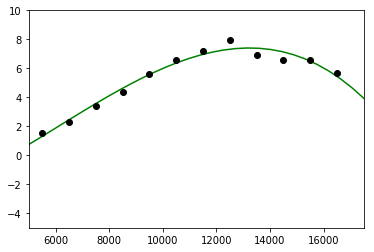

In [36]:
c = np.polyfit(Vel, D, 3)
plt.plot(v,c[0]*v**3+c[1]*v**2+c[2]*v+c[3], 'g-')
plt.plot(Vel,D, 'ko')
plt.xlim(5000,17500)
plt.ylim(-5,10)

print 'C3 = ', c[0]
print 'C2 = ', c[1]
print 'C1 = ', c[2]
print 'C0 = ', c[3]

### $4^{rd}$ Degree Polynomial

\begin{align}
D_{damp}-D_{YH} & = C_4 V^4 + C_3 V^3 + C_2 V^2 + C_1  V + C_0
\end{align}

C4 =  2.605259324009149e-15
C3 =  -1.2199608262107555e-10
C2 =  1.946942805458335e-06
C1 =  -0.011819932214775447
C0 =  25.637954811030067


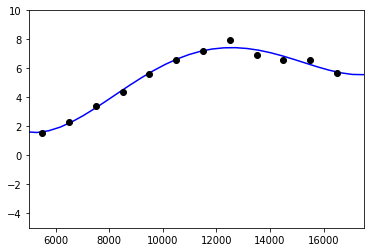

In [37]:
c = np.polyfit(Vel, D, 4)
plt.plot(v,c[0]*v**4+c[1]*v**3+c[2]*v**2+c[3]*v+c[4], 'b-')
plt.plot(Vel,D, 'ko')
plt.xlim(5000,17500)
plt.ylim(-5,10)

print 'C4 = ', c[0]
print 'C3 = ', c[1]
print 'C2 = ', c[2]
print 'C1 = ', c[3]
print 'C0 = ', c[4]

### Adding a few points in the beginning and end of the sequence to get the marginal slopes right
 - Red open circles were just used in the fitting process.
 - Black filled points are the original data points

C4 =  2.0336798685892477e-15
C3 =  -9.449363511758727e-11
C2 =  1.4725744438174861e-06
C1 =  -0.008371537089740528
C0 =  16.805109100897432


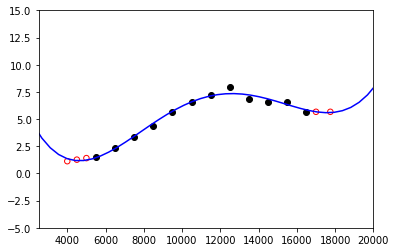

In [89]:
Vel = np.arange(5500,17500,1000)
D   = np.asarray([1.55, 2.31, 3.38, 4.37, 5.62, 6.55, 7.21, 7.98, 6.89, 6.60, 6.56, 5.67])

m = 1.55/5500
V0 = np.linspace(4000,5500,3, endpoint=False)
D0 = m*V0

Vel_ = np.concatenate((V0,Vel))
D_   = np.concatenate((D0,D))

V1 = np.linspace(17000,18500,2, endpoint=False)
D1 = 5.67*np.ones(2)

Vel_ = np.concatenate((Vel_,V1))
D_   = np.concatenate((D_,D1))

plt.plot(Vel,D, 'ko')


plt.ylim(-5,15)
plt.xlim(2500,20000)
c = np.polyfit(Vel_, D_, 4)
plt.plot(v,c[0]*v**4+c[1]*v**3+c[2]*v**2+c[3]*v+c[4], 'b-')

plt.scatter(V0,D0, s=30, facecolors='none', edgecolors='r')
plt.scatter(V1,D1, s=30, facecolors='none', edgecolors='r')
# for i, d in enumerate(D):
#     print Vel[i], d

print 'C4 = ', c[0]
print 'C3 = ', c[1]
print 'C2 = ', c[2]
print 'C1 = ', c[3]
print 'C0 = ', c[4]